# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set initial count quantities for organization
Count = 0
Group = 1
City_List = []

print("------------\nBegin Data Retrieval\n------------")

for city in cities:
    Count += 1
    
    print(f"Proccessing record {Count} of Set {Group} | {city}")
    
    if Count == 50:
        Count = 0
        Group += 1

    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=Imperial"
    response = requests.get(url).json()

    try:
        City_List.append({
            "City" : city,
            "Latitude" : response ["coord"]["lat"],
            "Longitude" : response ["coord"]["lon"],
            "Max Temp" : response ["main"]["temp_max"],
            "Humidity" : response ["main"]["humidity"],
            "Cloudiness" : response ["clouds"]["all"],
            "Wind" : response ["wind"]["speed"],
            "Country" : response ["sys"]["country"],
            "Date" : response ["dt"]
        })
    except Exception:
        print("City not found. Skipping...")
        pass
print("------------\nRetrieval of Data: Completed\n------------")
    

------------
Begin Data Retrieval
------------
Proccessing record 1 of Set 1 | sault sainte marie
Proccessing record 2 of Set 1 | hobart
Proccessing record 3 of Set 1 | aginskoye
Proccessing record 4 of Set 1 | puerto ayora
Proccessing record 5 of Set 1 | belushya guba
City not found. Skipping...
Proccessing record 6 of Set 1 | dikson
Proccessing record 7 of Set 1 | sampit
Proccessing record 8 of Set 1 | ushuaia
Proccessing record 9 of Set 1 | provideniya
Proccessing record 10 of Set 1 | mataura
Proccessing record 11 of Set 1 | norman wells
Proccessing record 12 of Set 1 | kapaa
Proccessing record 13 of Set 1 | sitka
Proccessing record 14 of Set 1 | taolanaro
City not found. Skipping...
Proccessing record 15 of Set 1 | kytmanovo
Proccessing record 16 of Set 1 | quelimane
Proccessing record 17 of Set 1 | avarua
Proccessing record 18 of Set 1 | chuy
Proccessing record 19 of Set 1 | tiksi
Proccessing record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Proccessing record 21 o

Proccessing record 35 of Set 4 | nemuro
Proccessing record 36 of Set 4 | urusha
Proccessing record 37 of Set 4 | shellbrook
Proccessing record 38 of Set 4 | lolua
City not found. Skipping...
Proccessing record 39 of Set 4 | nikolskoye
Proccessing record 40 of Set 4 | butaritari
Proccessing record 41 of Set 4 | lastoursville
Proccessing record 42 of Set 4 | tasiilaq
Proccessing record 43 of Set 4 | gombe
Proccessing record 44 of Set 4 | corn island
Proccessing record 45 of Set 4 | cheuskiny
City not found. Skipping...
Proccessing record 46 of Set 4 | beyneu
Proccessing record 47 of Set 4 | hobyo
Proccessing record 48 of Set 4 | saleaula
City not found. Skipping...
Proccessing record 49 of Set 4 | ahmadnagar
Proccessing record 50 of Set 4 | san patricio
Proccessing record 1 of Set 5 | koumac
Proccessing record 2 of Set 5 | vikhorevka
Proccessing record 3 of Set 5 | aykhal
Proccessing record 4 of Set 5 | alofi
Proccessing record 5 of Set 5 | grenville
Proccessing record 6 of Set 5 | aktau

Proccessing record 18 of Set 8 | codrington
Proccessing record 19 of Set 8 | puerto del rosario
Proccessing record 20 of Set 8 | ardistan
City not found. Skipping...
Proccessing record 21 of Set 8 | ayan
Proccessing record 22 of Set 8 | sassandra
Proccessing record 23 of Set 8 | bilma
Proccessing record 24 of Set 8 | kokoda
Proccessing record 25 of Set 8 | henties bay
Proccessing record 26 of Set 8 | santa helena
Proccessing record 27 of Set 8 | tavda
Proccessing record 28 of Set 8 | maceio
Proccessing record 29 of Set 8 | muzquiz
City not found. Skipping...
Proccessing record 30 of Set 8 | shahriyar
City not found. Skipping...
Proccessing record 31 of Set 8 | bafoulabe
Proccessing record 32 of Set 8 | kalabo
Proccessing record 33 of Set 8 | xingcheng
Proccessing record 34 of Set 8 | gravdal
Proccessing record 35 of Set 8 | gayny
Proccessing record 36 of Set 8 | los llanos de aridane
Proccessing record 37 of Set 8 | richards bay
Proccessing record 38 of Set 8 | dien bien
City not found

Proccessing record 5 of Set 12 | beringovskiy
Proccessing record 6 of Set 12 | kirkenes
Proccessing record 7 of Set 12 | atambua
Proccessing record 8 of Set 12 | alta floresta
Proccessing record 9 of Set 12 | tumannyy
City not found. Skipping...
Proccessing record 10 of Set 12 | bilibino
Proccessing record 11 of Set 12 | nouakchott
Proccessing record 12 of Set 12 | walvis bay
Proccessing record 13 of Set 12 | ulaangom
Proccessing record 14 of Set 12 | progreso
Proccessing record 15 of Set 12 | nantucket
Proccessing record 16 of Set 12 | jabinyanah
Proccessing record 17 of Set 12 | bend
Proccessing record 18 of Set 12 | aksu
Proccessing record 19 of Set 12 | raudeberg
Proccessing record 20 of Set 12 | port moresby
Proccessing record 21 of Set 12 | athabasca
Proccessing record 22 of Set 12 | jupiter
Proccessing record 23 of Set 12 | shache
Proccessing record 24 of Set 12 | hambantota
Proccessing record 25 of Set 12 | ayios kirikos
City not found. Skipping...
Proccessing record 26 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
Weather_Data = pd.DataFrame(City_List)
Weather_Data.head(25)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,sault sainte marie,46.5168,-84.3333,6.80,66,20,4.61,CA,1613183026
1,hobart,-42.8794,147.3294,66.20,55,40,13.80,AU,1613183026
2,aginskoye,51.1000,114.5300,-4.49,83,0,17.63,RU,1613183026
3,puerto ayora,-0.7393,-90.3518,75.99,95,89,1.99,EC,1613183026
4,dikson,73.5069,80.5464,-26.00,87,98,11.14,RU,1613183026
5,sampit,-2.5333,112.9500,87.66,63,10,2.95,ID,1613183026
6,ushuaia,-54.8000,-68.3000,57.20,51,75,12.66,AR,1613182856
7,provideniya,64.3833,-173.3000,-0.18,90,100,29.48,RU,1613183027
8,mataura,-46.1927,168.8643,73.00,54,85,4.00,NZ,1613183027
9,norman wells,65.2820,-126.8329,-11.20,77,20,3.44,CA,1613183027


In [6]:
Weather_Data.to_csv(r"My_Output_Data\Weather_DataFrame.csv", index= False) 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Just checking out how many cities I got
Weather_Data.count()

City          569
Latitude      569
Longitude     569
Max Temp      569
Humidity      569
Cloudiness    569
Wind          569
Country       569
Date          569
dtype: int64

In [8]:
# Use Describe to see if there is higher than 100% humidity
Weather_Data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,22.365787,15.928903,46.591670,74.261863,53.594025,7.715079,1.613183e+09
std,33.203577,89.943412,33.619425,18.284141,41.177801,6.463926,6.007342e+01
min,-54.800000,-175.200000,-31.950000,15.000000,0.000000,0.090000,1.613183e+09
25%,-3.666700,-61.616700,23.000000,65.000000,1.000000,3.240000,1.613183e+09
50%,27.752300,19.447300,59.000000,78.000000,71.000000,5.970000,1.613183e+09
75%,49.981100,95.322200,75.000000,88.000000,94.000000,10.360000,1.613183e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,47.580000,1.613183e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

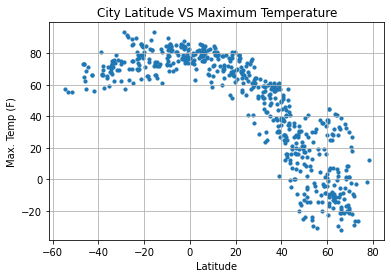

In [9]:
# Creating Scatter Plot

plt.scatter(Weather_Data["Latitude"], Weather_Data["Max Temp"], marker = "o", s=10)

#Titles

plt.title("City Latitude VS Maximum Temperature")
plt.ylabel("Max. Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure as .png file
plt.savefig("My_Output_Data/Latitude_vs_Temperature")

plt.show()

The above scatter plot shows that during this time of year, February, it's generally much colder in the Northern Hemishpere (positive latitude). The maximum temperature goes up the closer a city is to the Equator, but continues to stay warm in the Southern Hemisphere (negative latitude). This is may be because it's currently Summer in the Southern Hemisphere.

## Latitude vs. Humidity Plot

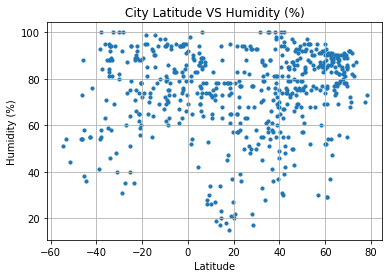

In [10]:
# Creating Scatter Plot

plt.scatter(Weather_Data["Latitude"], Weather_Data["Humidity"], marker = "o", s=10)

#Titles

plt.title("City Latitude VS Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure as .png file
plt.savefig("My_Output_Data/Latitude_vs_Humidity")

plt.show()

There is not a strong correlation between latitude and humidity. In very general terms, we can see that there is less humidity the closer the city is to the Equator and the most humid areas are at around -10 Latitude and 50 Latitude.

## Latitude vs. Cloudiness Plot

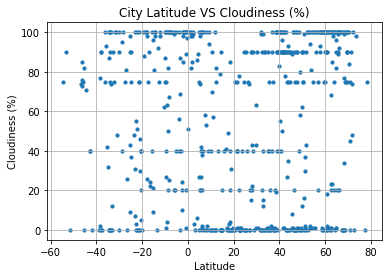

In [11]:
# Creating Scatter Plot

plt.scatter(Weather_Data["Latitude"], Weather_Data["Cloudiness"], marker = "o", s=10)

#Titles

plt.title("City Latitude VS Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure as .png file
plt.savefig("My_Output_Data/Latitude_vs_Cloudiness")

plt.show()

Generally, the cloud cover around the world today was either "complete" or "clear".

## Latitude vs. Wind Speed Plot

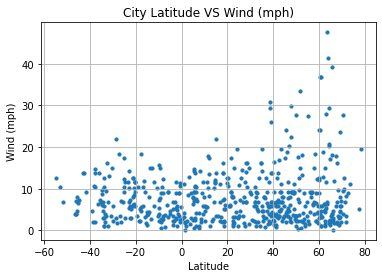

In [12]:
# Creating Scatter Plot

plt.scatter(Weather_Data["Latitude"], Weather_Data["Wind"], marker = "o", s=10)

#Titles

plt.title("City Latitude VS Wind (mph)")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure as .png file
plt.savefig("My_Output_Data/Latitude_vs_Wind_Speed")

plt.show()

It's good to see that only one city in this data set had "High Wind," that is, wind speeds above 40mph.

## Linear Regression

In [13]:
North_Hem = Weather_Data[Weather_Data["Latitude"] >= 0]
#plt.scatter(North_Hem ["Latitude"], North_Hem ["Max Temp"])

In [14]:
South_Hem = Weather_Data[Weather_Data["Latitude"] < 0]
South_Hem

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind,Country,Date
1,hobart,-42.8794,147.3294,66.20,55,40,13.80,AU,1613183026
3,puerto ayora,-0.7393,-90.3518,75.99,95,89,1.99,EC,1613183026
5,sampit,-2.5333,112.9500,87.66,63,10,2.95,ID,1613183026
6,ushuaia,-54.8000,-68.3000,57.20,51,75,12.66,AR,1613182856
8,mataura,-46.1927,168.8643,73.00,54,85,4.00,NZ,1613183027
...,...,...,...,...,...,...,...,...,...
562,karratha,-20.7377,116.8463,84.18,59,30,10.09,AU,1613183108
565,necochea,-38.5473,-58.7368,66.99,93,77,1.99,AR,1613183108
566,kalemie,-5.9475,29.1947,70.09,84,100,3.22,CD,1613183108
567,ambon,-3.6954,128.1814,84.20,79,40,3.44,ID,1613183108


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [58]:
North_Latitude = North_Hem["Latitude"]
North_Temp = North_Hem["Max Temp"]
N_slope, N_int, N_r, N_p, N_std_err = stats.linregress(North_Latitude, North_Temp)
Regress_Values = N_slope * North_Latitude + N_int
line_eq = "y = " + str(round(N_slope,2)) + "x + " + str(round(N_int,2))

The r-value is: 0.7537485211006204


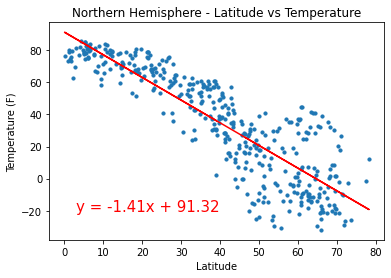

In [59]:
plt.scatter(North_Latitude, North_Temp, marker = "o", s=10)
plt.plot(North_Latitude,Regress_Values,"r-")

plt.title("Northern Hemisphere - Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(3,-20),fontsize=15,color="r")
print(f"The r-value is: {N_r**2}")

plt.savefig("My_Output_Data/North_vs_Temp")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [61]:
South_Latitude = South_Hem["Latitude"]
South_Temp = South_Hem["Max Temp"]
S_slope, S_int, S_r, S_p, S_std_err = stats.linregress(South_Latitude, South_Temp)
Regress_Values = S_slope * South_Latitude + S_int
line_eq = "y = " + str(round(S_slope,2)) + "x + " + str(round(S_int,2))

The r-value is: 0.28433836092434017


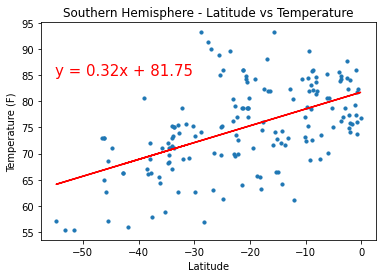

In [62]:
plt.scatter(South_Latitude, South_Temp, marker = "o", s=10)
plt.plot(South_Latitude,Regress_Values,"r-")

plt.title("Southern Hemisphere - Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,85),fontsize=15,color="r")
print(f"The r-value is: {S_r**2}")

plt.savefig("My_Output_Data/South_vs_Temp")
plt.show()

By separating the data into the two hemispheres, we can more clearly see that the closer a city is to the equator the more likely it will have a higher maximum temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [63]:
North_Latitude = North_Hem["Latitude"]
North_Humid = North_Hem["Humidity"]
N_slope, N_int, N_r, N_p, N_std_err = stats.linregress(North_Latitude, North_Humid)
Regress_Values = N_slope * North_Latitude + N_int
line_eq = "y = " + str(round(N_slope,2)) + "x + " + str(round(N_int,2))

The r-value is: 0.07353690071193171


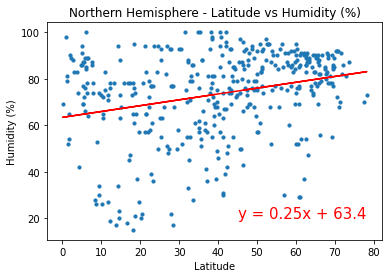

In [64]:
plt.scatter(North_Latitude, North_Humid, marker = "o", s=10)
plt.plot(North_Latitude,Regress_Values,"r-")

plt.title("Northern Hemisphere - Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(45, 20),fontsize=15,color="r")
print(f"The r-value is: {N_r**2}")

plt.savefig("My_Output_Data/North_vs_Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [65]:
South_Latitude = South_Hem["Latitude"]
South_Humid = South_Hem["Humidity"]
S_slope, S_int, S_r, S_p, S_std_err = stats.linregress(South_Latitude, South_Humid)
Regress_Values = S_slope * South_Latitude + S_int
line_eq = "y = " + str(round(S_slope,2)) + "x + " + str(round(S_int,2))

The r-value is: 0.1072617929681193


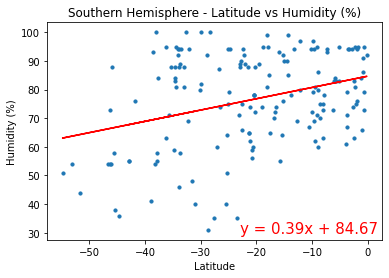

In [66]:
plt.scatter(South_Latitude, South_Humid, marker = "o", s=10)
plt.plot(South_Latitude,Regress_Values,"r-")

plt.title("Southern Hemisphere - Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-23,30),fontsize=15,color="r")
print(f"The r-value is: {S_r**2}")

plt.savefig("My_Output_Data/South_vs_Humidity")
plt.show()

When separating the data by hemisphere the relationship between latitude and humidity appears to change. My statement above was, that the closer the city is to the Equator, the less humid it will be. While this stays true for the Northern Hemisphere, it's clearly not the case for the Southern Hemisphere. 

This is a great example of why it's important to organize the data to take a closer look at the details.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [67]:
North_Latitude = North_Hem["Latitude"]
North_Clouds = North_Hem["Cloudiness"]
N_slope, N_int, N_r, N_p, N_std_err = stats.linregress(North_Latitude, North_Clouds)
Regress_Values = N_slope * North_Latitude + N_int
line_eq = "y = " + str(round(N_slope,2)) + "x + " + str(round(N_int,2))

The r-value is: 0.0485461090274202


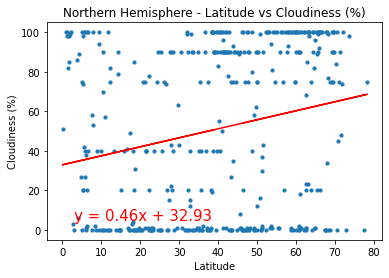

In [68]:
plt.scatter(North_Latitude, North_Clouds, marker = "o", s=10)
plt.plot(North_Latitude,Regress_Values,"r-")

plt.title("Northern Hemisphere - Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(3,5),fontsize=15,color="r")
print(f"The r-value is: {N_r**2}")

plt.savefig("My_Output_Data/North_vs_Clouds")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [69]:
South_Latitude = South_Hem["Latitude"]
South_Clouds = South_Hem["Cloudiness"]
S_slope, S_int, S_r, S_p, S_std_err = stats.linregress(South_Latitude, South_Clouds)
Regress_Values = S_slope * South_Latitude + S_int
line_eq = "y = " + str(round(S_slope,2)) + "x + " + str(round(S_int,2))

The r-value is: 0.019572736660814046


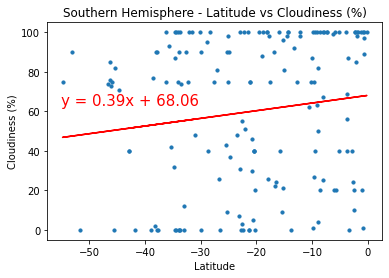

In [70]:
plt.scatter(South_Latitude, South_Clouds, marker = "o", s=10)
plt.plot(South_Latitude,Regress_Values,"r-")

plt.title("Southern Hemisphere - Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,63),fontsize=15,color="r")
print(f"The r-value is: {S_r**2}")

plt.savefig("My_Output_Data/South_vs_Clouds")
plt.show()

The City's latitude vs cloud cover continues to show little to no correlation even when separated by hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [71]:
North_Latitude = North_Hem["Latitude"]
North_Wind = North_Hem["Wind"]
N_slope, N_int, N_r, N_p, N_std_err = stats.linregress(North_Latitude, North_Wind)
Regress_Values = N_slope * North_Latitude + N_int
line_eq = "y = " + str(round(N_slope,2)) + "x + " + str(round(N_int,2))

The r-value is: 0.011852580564142888


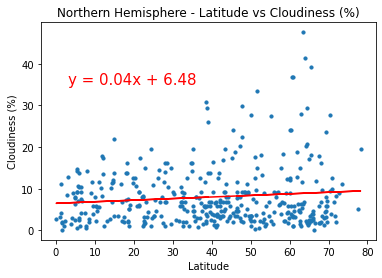

In [72]:
plt.scatter(North_Latitude, North_Wind, marker = "o", s=10)
plt.plot(North_Latitude,Regress_Values,"r-")

plt.title("Northern Hemisphere - Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(3,35),fontsize=15,color="r")
print(f"The r-value is: {N_r**2}")

plt.savefig("My_Output_Data/North_vs_Wind")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [73]:
South_Latitude = South_Hem["Latitude"]
South_Wind = South_Hem["Wind"]
S_slope, S_int, S_r, S_p, S_std_err = stats.linregress(South_Latitude, South_Wind)
Regress_Values = S_slope * South_Latitude + S_int
line_eq = "y = " + str(round(S_slope,2)) + "x + " + str(round(S_int,2))

The r-value is: 0.030325364864328328


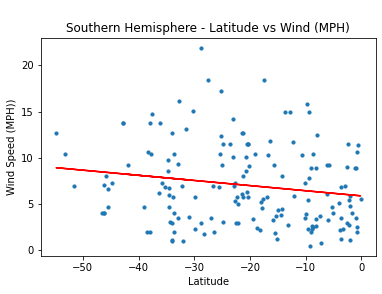

In [74]:
plt.scatter(South_Latitude, South_Wind, marker = "o", s=10)
plt.plot(South_Latitude,Regress_Values,"r-")

plt.title("Southern Hemisphere - Latitude vs Wind (MPH)")
plt.ylabel("Wind Speed (MPH))")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,25),fontsize=15,color="r")
print(f"The r-value is: {S_r**2}")

plt.savefig("My_Output_Data/South_vs_Wind")
plt.show()

While there is still no noticeable correlation between latitude and wind, we can see that on this day, the Northern Hemisphere was a bit windier.